#### EBOLA VIRUS  MODEL ON THREE STAGE

In [60]:
'''The EBOLA Model: Free-Spread Stage'''
def ebola(par):
    s_t, e_t, i_t, d_t = par[0], par[1], par[2], par[3]
    dsdt = -beta*s_t*(1-gamma)*i_t
    dedt = (beta*s_t*(1-gamma)*i_t)-(theta*e_t)
    didt = (theta*e_t)-(gamma*i_t)
    dddt = (gamma*i_t)
    return np.array([dsdt, dedt, didt, dddt])

'''The EBOLA Model: Isolation-Control Stage'''
def ebola2(par):
    s_t, e_t, i_t, q_t, d_t = par[0], par[1], par[2], par[3], par[4]
    dsdt = -beta*s_t*(1-delta-gamma)*i_t
    dedt = (beta*s_t*(1-delta-gamma)*i_t)-(theta*e_t)
    didt = (theta*e_t)-((gamma+delta)*i_t)
    dqdt = (delta*i_t)-(epsilon*q_t)
    dddt = (gamma*i_t)+(epsilon*q_t)
    return np.array([dsdt, dedt, didt, dqdt, dddt])

'''The EBOLA Model: Prevent-Treatment Stage'''
def ebola3(par):
    s_t, e_t, i_t, q_t, r_t, d_t = par[0], par[1], par[2], par[3], par[4], par[5]
    dsdt = -beta*(1-alpha)*s_t*(1-delta-gamma)*i_t
    dedt = (beta*(1-alpha)*s_t*(1-delta-gamma-rho)*i_t)-(theta*e_t)
    didt = (theta*e_t)-((gamma+delta+rho)*i_t)
    dqdt = (delta*i_t)-((epsilon+rho)*q_t)
    drdt = rho*(i_t+q_t)
    dddt = (gamma*i_t)+(epsilon*q_t)
    return np.array([dsdt, dedt, didt, dqdt, drdt, dddt])

'''The Fourth Order Runge Kutta Method: Free-Spread Stage'''
def rk4(state):
    k1=ebola(state)
    k2=ebola(state+((dt/2)*k1))
    k3=ebola(state+(k2*(dt/2)))
    k4=ebola(state+(k3*dt))
    rk4res=state+((dt/6)*(k1+(2*k2)+(2*k3)+k4))
    return rk4res

'''The Fourth Order Runge Kutta Method: Isolation-Control Stage'''
def rk4ic(stateq):
    k1=ebola2(stateq)
    k2=ebola2(stateq+((dt/2)*k1))
    k3=ebola2(stateq+(k2*(dt/2)))
    k4=ebola2(stateq+(k3*dt))
    rk4res=stateq+((dt/6)*(k1+(2*k2)+(2*k3)+k4))
    return rk4res

'''The Fourth Order Runge Kutta Method: Prevent-Treatment Stage'''
def rk4pt(statet):
    k1=ebola3(statet)
    k2=ebola3(statet+((dt/2)*k1))
    k3=ebola3(statet+(k2*(dt/2)))
    k4=ebola3(statet+(k3*dt))
    rk4res=statet+((dt/6)*(k1+(2*k2)+(2*k3)+k4))
    return rk4res

In [61]:
import numpy as np
'''Declaration and intialization of variables'''
tinital=1
tfinal=150
dt=1
time=np.arange(tinital,tfinal+dt,dt)

n = 10000
'''beta = 0.06 0.4
gamma = 0.9
theta = 0.08 0.1'''

beta=0.002
gamma=0.5
theta=0.1

iinitial=1
sinitial=n-iinitial
einitial=0
dinitial=0

seid=np.zeros((4,len(time)))
seid[:,0]=[sinitial,einitial,iinitial,dinitial]

In [62]:
'''COVID-19 Code: Free-Spread Stage'''
iterate=1
maxiterate=500
while iterate < maxiterate:
    for t in range(len(time)-1):
        seid[:,t+1]=rk4(seid[:,t])
    error=0
    for t in range(len(time)):
        error=max(error,max(seid[:,t]))      
    if error < 0.01:
        break
    iterate+=1
    if iterate==maxiterate:
        print('convergence not reached at some point')

convergence not reached at some point


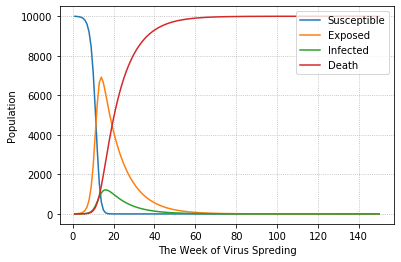

In [63]:
'''Visualizing EBOLA: Free-Spread Stage'''
import matplotlib.pyplot as plt
s,e,i,d = seid[0,:], seid[1,:], seid[2,:], seid[3,:]
plt.plot(time, s, label='Susceptible')
plt.plot(time, e, label='Exposed')
plt.plot(time, i, label='Infected')
plt.plot(time, d, label='Death')
plt.legend(loc=1)
plt.grid(True, linestyle='dotted')
plt.xlabel('The Week of Virus Spreding')
plt.ylabel('Population')
plt.savefig('/Users/LIGHT/Desktop/Light Work/Diffusion GitLab/diffusion-processes/List_P_257389_Segun_Light_Jegede/SEID EBOLA - Data Parameter.png')
plt.show()

In [64]:
import numpy as np
'''Declaration and intialization of variables'''
tinital=1
tfinal=150
dt=1
time=np.arange(tinital,tfinal+dt,dt)

n = 10000
'''beta = 0.06
gamma = 0.3
theta = 0.08
epsilon = 0.3
delta = 0.4'''
beta=0.002
gamma=0.3
theta=0.1
epsilon = 0.5
delta = 0.16

iinitial=1
sinitial=n-iinitial
einitial=0
qinitial=0
dinitial=0

seiqd=np.zeros((5,len(time)))
seiqd[:,0]=[sinitial,einitial,iinitial,qinitial,dinitial]
        

In [65]:
'''COVID-19 Code: Isolation-Control Stage'''
iterate=1
maxiterate=500
while iterate < maxiterate:
    for t in range(len(time)-1):
        seiqd[:,t+1]=rk4ic(seiqd[:,t])
    error=0
    for t in range(len(time)):
        error=max(error,max(seiqd[:,t]))      
    if error < 0.01:
        break
    iterate+=1
    if iterate==maxiterate:
        print('convergence not reached at some point')   

convergence not reached at some point


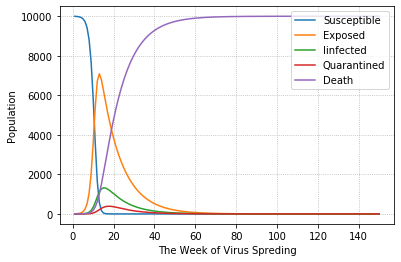

In [66]:
'''Visualizing EBOLA: Isolation-Control Stage'''
import matplotlib.pyplot as plt
s,e,i,q,d = seiqd[0,:], seiqd[1,:], seiqd[2,:], seiqd[3,:], seiqd[4,:]
plt.plot(time, s, label='Susceptible')
plt.plot(time, e, label='Exposed')
plt.plot(time, i, label='Iinfected')
plt.plot(time, q, label='Quarantined')
plt.plot(time, d, label='Death')
plt.legend(loc=1)
plt.grid(True, linestyle='dotted')
plt.xlabel('The Week of Virus Spreding')
plt.ylabel('Population')
plt.savefig('/Users/LIGHT/Desktop/Light Work/Diffusion GitLab/diffusion-processes/List_P_257389_Segun_Light_Jegede/SEIQD EBOLA - Data Parameter.png')
plt.show()

In [67]:
import numpy as np
'''Declaration and intialization of variables'''
tinital=1
tfinal=150
dt=1
time=np.arange(tinital,tfinal+dt,dt)

n = 10000
'''alpha = 0.03
beta = 0.006
gamma = 0.9
rho = 0.06
epsilon = 0.9
delta = 0.5
theta = 0.012'''

alpha = 0.016
rho = 0.2
beta=0.002
gamma=0.3
theta=0.1
epsilon = 0.5
delta = 0.16

iinitial=1
sinitial=n-iinitial
einitial=0
qinitial=0
rinitial=0
dinitial=0

seiqrd=np.zeros((6,len(time)))
seiqrd[:,0]=[sinitial,einitial,iinitial,qinitial,rinitial,dinitial]


In [68]:
'''COVID-19 Code: Prevent-Treatment Stage'''
iterate=1
maxiterate=500
while iterate < maxiterate:
    for t in range(len(time)-1):
        seiqrd[:,t+1]=rk4pt(seiqrd[:,t])
    error=0
    for t in range(len(time)):
        error=max(error,max(seiqrd[:,t]))      
    if error < 0.01:
        break
    iterate+=1
    if iterate==maxiterate:
        print('convergence not reached at some point')   

convergence not reached at some point


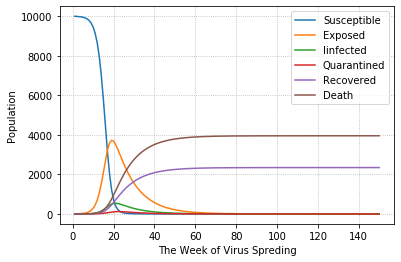

In [69]:
'''Visualizing EBOLA: Prevent-Treatment Stage'''
import matplotlib.pyplot as plt
s,e,i,q,r,d = seiqrd[0,:], seiqrd[1,:], seiqrd[2,:], seiqrd[3,:], seiqrd[4,:], seiqrd[5,:]
plt.plot(time, s, label='Susceptible')
plt.plot(time, e, label='Exposed')
plt.plot(time, i, label='Iinfected')
plt.plot(time, q, label='Quarantined')
plt.plot(time, r, label='Recovered')
plt.plot(time, d, label='Death')
plt.legend(loc=1)
plt.grid(True, linestyle='dotted')
plt.xlabel('The Week of Virus Spreding')
plt.ylabel('Population')
plt.savefig('/Users/LIGHT/Desktop/Light Work/Diffusion GitLab/diffusion-processes/List_P_257389_Segun_Light_Jegede/SEIQRD EBOLA - Data Parameter.png')
plt.show()

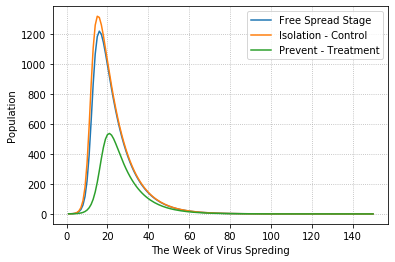

In [70]:
'''Visualizing COVID-19'''
import matplotlib.pyplot as plt
i1,i2,i3 = seid[2,:], seiqd[2,:], seiqrd[2,:]
plt.plot(time, i1, label='Free Spread Stage')
plt.plot(time, i2, label='Isolation - Control')
plt.plot(time, i3, label='Prevent - Treatment')
plt.legend(loc=1)
plt.grid(True, linestyle='dotted')
plt.xlabel('The Week of Virus Spreding')
plt.ylabel('Population')
plt.savefig('/Users/LIGHT/Desktop/Light Work/Diffusion GitLab/diffusion-processes/List_P_257389_Segun_Light_Jegede/ALL INFECTION IN EBOLA MODEL - Data Parameter.png')
plt.show()